<a href="https://colab.research.google.com/github/Sandeep-kmr/OCR-MICR-CheckReading/blob/main/OCR_MICRReadBankCheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def mult_by_five(x):
    return 5 * x

mult_by_five(4)

def call(fn, arg):
    """Call fn on arg"""
    return fn(fn(arg))
call(mult_by_five, 5)

125

In [3]:
!apt install tesseract-ocr
!apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (5,421 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../tesserac

In [4]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14070 sha256=eedf7925240dbd8ba693552ebfb01a749a9cdc754aa8f3d3923fcf83ca42c825
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


In [15]:
!ls -alrt /usr/bin/tesseract

-rwxr-xr-x 1 root root 26712 Apr  7  2018 /usr/bin/tesseract


In [16]:
import pytesseract
from PIL import Image
import requests
from io import BytesIO
import cv2
import numpy as np

In [17]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

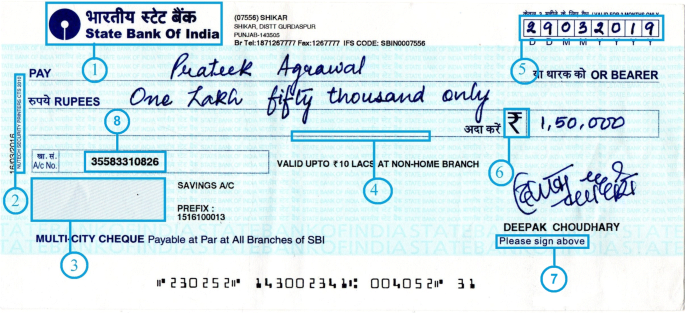

In [47]:
path = 'https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs11042-020-09818-1/MediaObjects/11042_2020_9818_Fig2_HTML.png'
content = requests.get(path).content
image = Image.open(BytesIO(content))
image

In [48]:
print(pytesseract.image_to_string(image, lang='eng'))

 

 

   

 

 

 

 

 

 

 

   
   
  

SAVINGS Ae

Perera

resin Como

MULTHCITY CHEQUE Payable at Par at AllBranches of SBI
w230 252" 44300234R OOLOS2" 3b

 



In [33]:
!wget https://raw.githubusercontent.com/BigPino67/Tesseract-MICR-OCR/master/Tessdata/mcr.traineddata

--2022-01-24 07:36:23--  https://raw.githubusercontent.com/BigPino67/Tesseract-MICR-OCR/master/Tessdata/mcr.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147363 (144K) [application/octet-stream]
Saving to: ‘mcr.traineddata’

mcr.traineddata     100%[===================>] 143.91K  --.-KB/s    in 0.003s  

2022-01-24 07:36:23 (44.4 MB/s) - ‘mcr.traineddata’ saved [147363/147363]



In [34]:
!cp mcr.traineddata /usr/share/tesseract-ocr/4.00/tessdata/

In [52]:
check_img = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
micr_img = check_img[250:313, 0:685]
check_img.shape

(313, 685, 3)

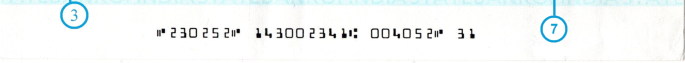

In [53]:
import google.colab.patches
google.colab.patches.cv2_imshow(micr_img)

In [54]:
print(pytesseract.image_to_string(micr_img, lang='mcr'))

0 d230252c 1430823400 08405280 31 5

